## Hoja de trabajo 7.2 NN ##
**José Hurtarte 19707**  
**Andrei Portales 19825**  
**Christian Pérez 19710**  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [2]:
data = pd.read_csv('data/train.csv').drop(['Id'], axis = 1)


In [3]:
data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Filtrado de variables cara, mediana y económica

In [5]:
low_price_limit = data.SalePrice.quantile(0.33)
mid_price_limit = data.SalePrice.quantile(0.67)

(low_price_limit, mid_price_limit)

(139000.0, 191000.0)

In [6]:
data['PriceRangeInt'] = 1
data['PriceRangeInt'][data['SalePrice'] < low_price_limit] = 0
data['PriceRangeInt'][data['SalePrice'] > mid_price_limit] = 2
data['PriceRangeInt']

C:\Users\josej\AppData\Local\Temp\ipykernel_19632\716762574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PriceRangeInt'][data['SalePrice'] < low_price_limit] = 0
C:\Users\josej\AppData\Local\Temp\ipykernel_19632\716762574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PriceRangeInt'][data['SalePrice'] > mid_price_limit] = 2


0       2
1       1
2       2
3       1
4       2
       ..
1455    1
1456    2
1457    2
1458    1
1459    1
Name: PriceRangeInt, Length: 1460, dtype: int64

In [7]:
predictors_1 =['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'OverallQual']
data[predictors_1]

,GrLivArea,GarageCars,TotalBsmtSF,OverallQual
0,1710,2,856,7
1,1262,2,1262,6
2,1786,2,920,7
3,1717,3,756,7
4,2198,3,1145,8
...,...,...,...,...
1455,1647,2,953,6
1456,2073,2,1542,6
1457,2340,1,1152,7
1458,1078,1,1078,5


<AxesSubplot:>

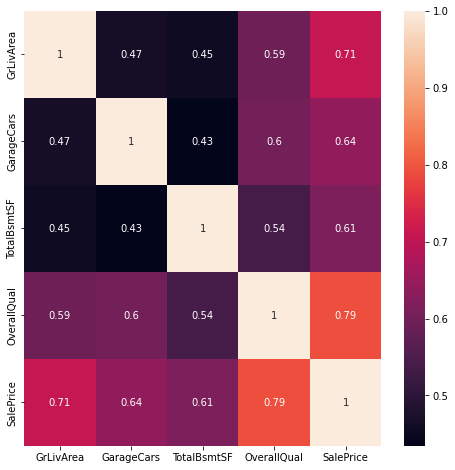

In [8]:
plt.subplots(figsize = (8,8))
sns.heatmap(data[predictors_1 + ['SalePrice']].corr(), xticklabels=data[predictors_1 + ['SalePrice']].corr().columns, yticklabels=data[predictors_1 + ['SalePrice']].corr().columns, annot=True)


Para las variables a incluír en esta hoja de trabajo también se escogieron todas aquellas que tuviesen una correlación con coeficiente de Pearson alta y que tuviesen una correlación no fuerte entre ellas para evitar el overfit. Además el criterio es similar al de hojas de trabajo anteriores para poder tener una comparativa más exacta entre modelos de predicción

## Modelos de predicción categórica

In [9]:
# Data con variables para no modificar dataset original
data_vars = data[predictors_1  + ['PriceRangeInt']]
data_vars = data_vars.dropna()

y = data_vars['PriceRangeInt']  #La variable respuesta
X = data_vars[predictors_1] #El resto de los datos

In [10]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7, random_state=123)


#### Normalización de los datos

In [11]:
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Modelo 1 con Topología de 90 capas con 30 neuronas y función de activación de Unidades lineales rectificadas 

In [16]:
modelo_mlp1 = MLPClassifier(hidden_layer_sizes=(90,30), max_iter=200, random_state=123, activation='relu', verbose=True)
modelo_mlp1.fit(X_train, y_train)
y_pred = modelo_mlp1.predict(X_test)
y_pred

Iteration 1, loss = 1.11793315
Iteration 2, loss = 1.02499585
Iteration 3, loss = 0.94906135
Iteration 4, loss = 0.88482152
Iteration 5, loss = 0.82937068
Iteration 6, loss = 0.77955118
Iteration 7, loss = 0.73712272
Iteration 8, loss = 0.70014688
Iteration 9, loss = 0.66833078
Iteration 10, loss = 0.64037249
Iteration 11, loss = 0.61605711
Iteration 12, loss = 0.59452160
Iteration 13, loss = 0.57587118
Iteration 14, loss = 0.55955508
Iteration 15, loss = 0.54551871
Iteration 16, loss = 0.53498809
Iteration 17, loss = 0.52281841
Iteration 18, loss = 0.51516508
Iteration 19, loss = 0.50872370
Iteration 20, loss = 0.50242401
Iteration 21, loss = 0.49684017
Iteration 22, loss = 0.49402936
Iteration 23, loss = 0.49122533
Iteration 24, loss = 0.48588512
Iteration 25, loss = 0.48320206
Iteration 26, loss = 0.48185314
Iteration 27, loss = 0.47957412
Iteration 28, loss = 0.47639324
Iteration 29, loss = 0.47378013
Iteration 30, loss = 0.47175651
Iteration 31, loss = 0.46918746
Iteration 32, los

C:\Users\josej\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 1,
       0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 1,
       1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1,
       0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 0,
       0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2,
       2, 2, 0, 2, 1, 0, 1, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 1, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2,
       1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 1, 2, 0, 0,
       1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 2, 2,
       2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2,
       1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 1, 0, 2,

In [17]:
y_pred = modelo_mlp1.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [18]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para RNA de clasificación 1\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión para RNA de clasificación 1
 [[106  24   3]
 [ 24 113  16]
 [  1  22 129]]
Accuracy:  0.7945205479452054


In [19]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.80      0.80       133
           1       0.71      0.74      0.72       153
           2       0.87      0.85      0.86       152

    accuracy                           0.79       438
   macro avg       0.80      0.79      0.80       438
weighted avg       0.80      0.79      0.80       438



### Modelo 2 con Topología de 24 capas con 56 neuronas y función de activación de Sigmoide logistico

In [23]:
modelo_mlp2 = MLPClassifier(hidden_layer_sizes=(24,56), max_iter=200, random_state=123, activation='logistic', verbose=True)
modelo_mlp2.fit(X_train, y_train)
y_pred = modelo_mlp2.predict(X_test)
y_pred

Iteration 1, loss = 1.17238092
Iteration 2, loss = 1.12492993
Iteration 3, loss = 1.10417415
Iteration 4, loss = 1.09890965
Iteration 5, loss = 1.09715105
Iteration 6, loss = 1.09349204
Iteration 7, loss = 1.08767144
Iteration 8, loss = 1.08408779
Iteration 9, loss = 1.08081929
Iteration 10, loss = 1.07659379
Iteration 11, loss = 1.07180250
Iteration 12, loss = 1.06651538
Iteration 13, loss = 1.06099809
Iteration 14, loss = 1.05509385
Iteration 15, loss = 1.04870807
Iteration 16, loss = 1.04007137
Iteration 17, loss = 1.03123109
Iteration 18, loss = 1.02181902
Iteration 19, loss = 1.01108046
Iteration 20, loss = 0.99947097
Iteration 21, loss = 0.98555530
Iteration 22, loss = 0.97081029
Iteration 23, loss = 0.95562022
Iteration 24, loss = 0.93911539
Iteration 25, loss = 0.91956560
Iteration 26, loss = 0.90115277
Iteration 27, loss = 0.88200742
Iteration 28, loss = 0.86218851
Iteration 29, loss = 0.84241503
Iteration 30, loss = 0.82411546
Iteration 31, loss = 0.80458384
Iteration 32, los

C:\Users\josej\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([2, 1, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1,
       0, 1, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 1,
       2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1,
       0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0,
       0, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2,
       2, 2, 0, 2, 1, 0, 1, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, 0, 2,
       2, 1, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2,
       1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 1, 2, 0, 0,
       1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2,
       2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 1,
       1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2,

In [24]:
y_pred = modelo_mlp2.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [25]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para RNA de clasificación 2\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión para RNA de clasificación 2
 [[107  23   3]
 [ 33 105  15]
 [  0  24 128]]
Accuracy:  0.776255707762557


In [26]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.76      0.80      0.78       133
           1       0.69      0.69      0.69       153
           2       0.88      0.84      0.86       152

    accuracy                           0.78       438
   macro avg       0.78      0.78      0.78       438
weighted avg       0.78      0.78      0.78       438

